In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/handwritten/A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


In [ ]:
shuffle_data = shuffle(x_train)

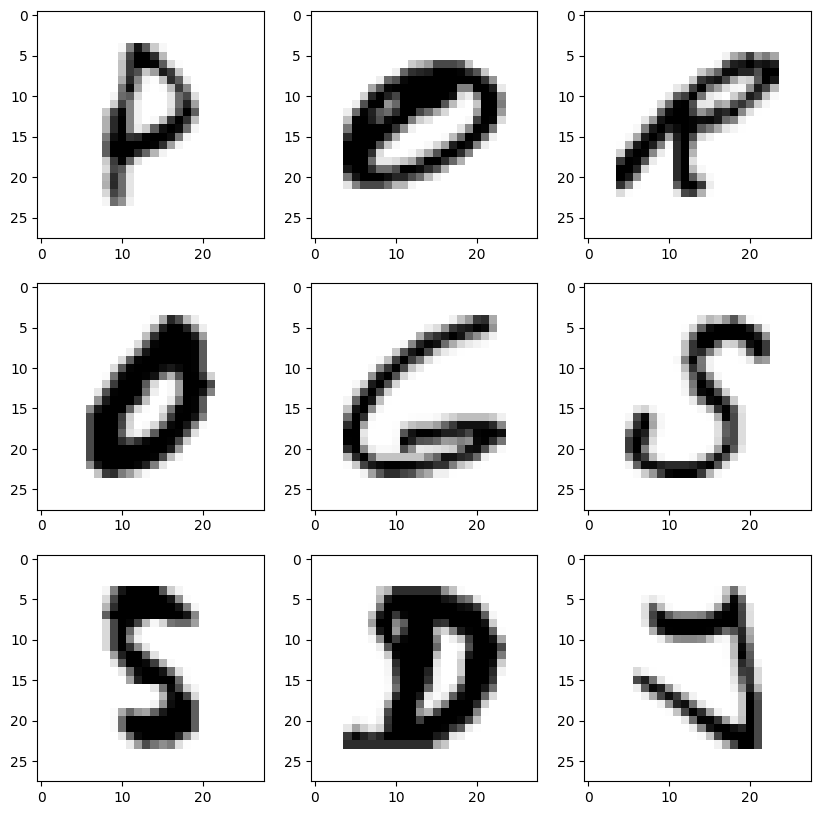

In [ ]:
import cv2
fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
"training of our model."
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26)
y_testing = to_categorical(y_test, num_classes = 26)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,522 (478.60 KB)

 Trainable params: 122,522 (478.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 483s 51ms/step - accuracy: 0.9776 - loss: 0.0881 - val_accuracy: 0.9715 - val_loss: 0.1107
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 512s 52ms/step - accuracy: 0.9781 - loss: 0.0813 - val_accuracy: 0.9786 - val_loss: 0.0847
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 487s 51ms/step - accuracy: 0.9793 - loss: 0.0783 - val_accuracy: 0.9779 - val_loss: 0.0958
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 494s 53ms/step - accuracy: 0.9799 - loss: 0.0790 - val_accuracy: 0.9766 - val_loss: 0.0972
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 487s 51ms/step - accuracy: 0.9806 - loss: 0.0765 - val_accuracy: 0.9789 - val_loss: 0.0945


In [ ]:
model.save(r'handwritten_character_recog_model.keras')

In [ ]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

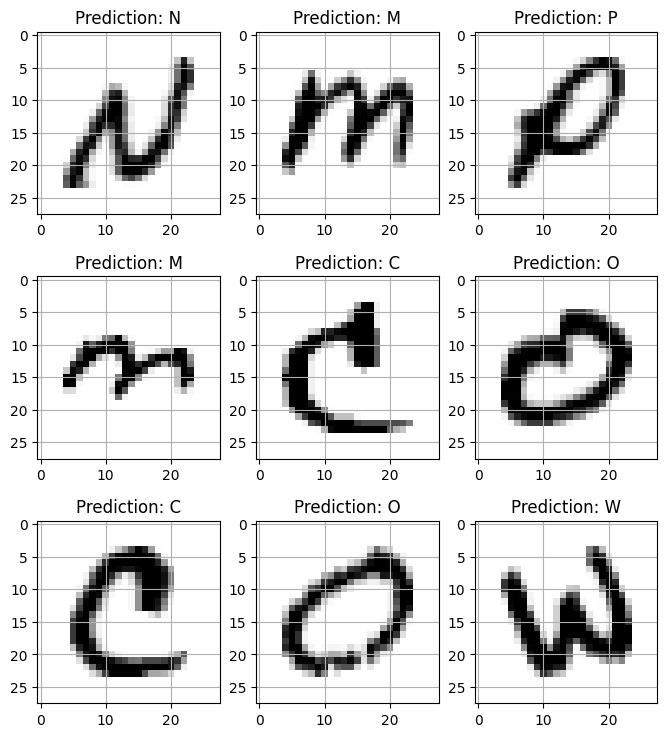

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
import os
print(os.getcwd())  # This prints the current working directory


/content


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


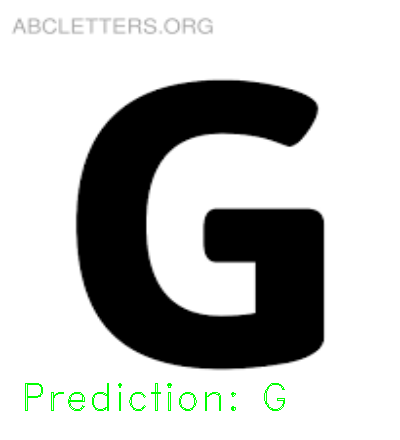

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from keras.models import load_model
model = load_model('handwritten_character_recog_model.keras')

words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

image = cv2.imread('/content/drive/MyDrive/handwritten/handwritten-character-recognition-source-code/G.png')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))

image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))

prediction = words[np.argmax(model.predict(final_image))]

cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2_imshow(image)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()